<a href="https://colab.research.google.com/github/g-nyuk/Demand-Side_Fluctuation/blob/Constant-Conditions/(Constant_Demand)Demand_Side_Fluctuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#INITIAL CONDITION - FIRM
INITIAL_CAPITAL = 100
INITIAL_PATHNUM = 1

#COMPETION CONDITON
PROBABILITY = 0.25
COMPENSATION = 40
UNIT_EXPENDITURE = 10
TIME_DURATION = 100

In [71]:
class Firm:
    def __init__(self, name, capital=INITIAL_CAPITAL, numPath=INITIAL_PATHNUM, unit_expenditure=UNIT_EXPENDITURE, compensation=COMPENSATION):
        self.name = name
        self.capital = capital
        self.numPath = numPath
        self.unit_expenditure = unit_expenditure
        self.compensation = compensation
        self.bankrupt = False

    def invest(self):
        if self.capital < self.unit_expenditure * self.numPath:
            self.bankrupt = True
            return 0

        self.capital -= self.unit_expenditure * self.numPath

        successes = sum(random.random() < PROBABILITY for _ in range(self.numPath))
        self.capital += successes * self.compensation

        if self.capital // 100 > self.numPath :
            self.numPath += 1

        if self.capital // 100 < self.numPath and self.numPath != 1 :
            self.numPath -= 1

        return successes

In [11]:
def single_simulation(num_firms = 2):
    firms = [Firm(f'Firm {chr(65+i)}') for i in range(num_firms)]
    data = []

    for timestep in range(TIME_DURATION):
        for firm in firms:
            if firm.bankrupt:
                continue
            successes = firm.invest()
            data.append({'timestep': timestep, 'firm': firm.name, 'successes': successes, 'capital': firm.capital, 'numPath': firm.numPath})

    df = pd.DataFrame(data)
    df = df.astype({'timestep': int, 'successes': int, 'capital': np.float64, 'numPath': int})

    bankrupt_firms = len([firm for firm in firms if firm.bankrupt])

    return df

In [34]:
df = single_simulation()

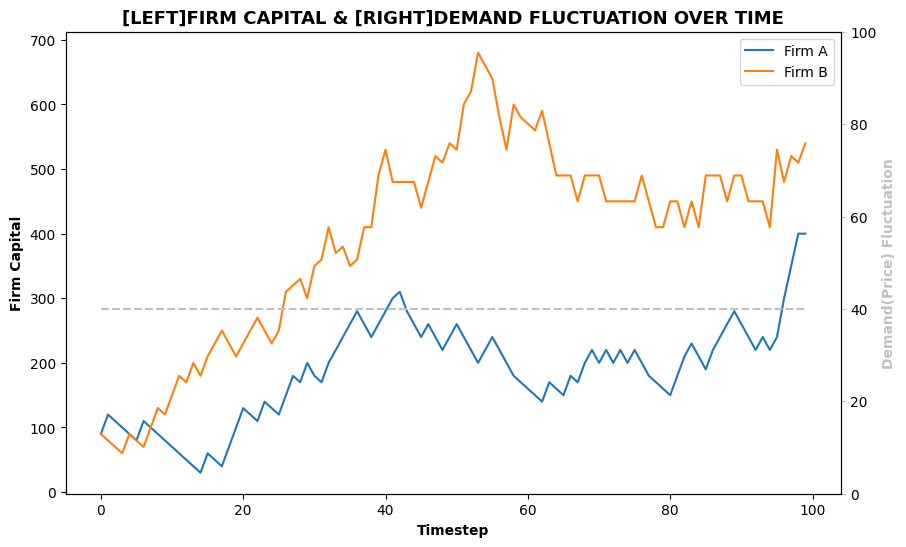

In [35]:
firm_a = df[df['firm'] == 'Firm A']
firm_b = df[df['firm'] == 'Firm B']

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot()

ax1.plot(firm_a['timestep'], firm_a['capital'], label='Firm A')
ax1.plot(firm_b['timestep'], firm_b['capital'], label='Firm B')
ax1.set_xlabel('Timestep', fontweight = 'bold', fontsize = 10)
ax1.set_ylabel('Firm Capital', fontweight = 'bold', fontsize = 10)
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(firm_a['timestep'], [40 for _ in range(len(firm_a['timestep']))], '--', color = 'silver')
ax2.set_ylabel('Demand(Price) Fluctuation', fontweight = 'bold', color = 'silver', fontsize = 10)
ax2.set_ylim(0, 100)
ax2.tick_params(axis='y', color = 'silver')


plt.title('[LEFT]FIRM CAPITAL & [RIGHT]DEMAND FLUCTUATION OVER TIME', fontweight = 'heavy', fontsize = 13)
plt.show()

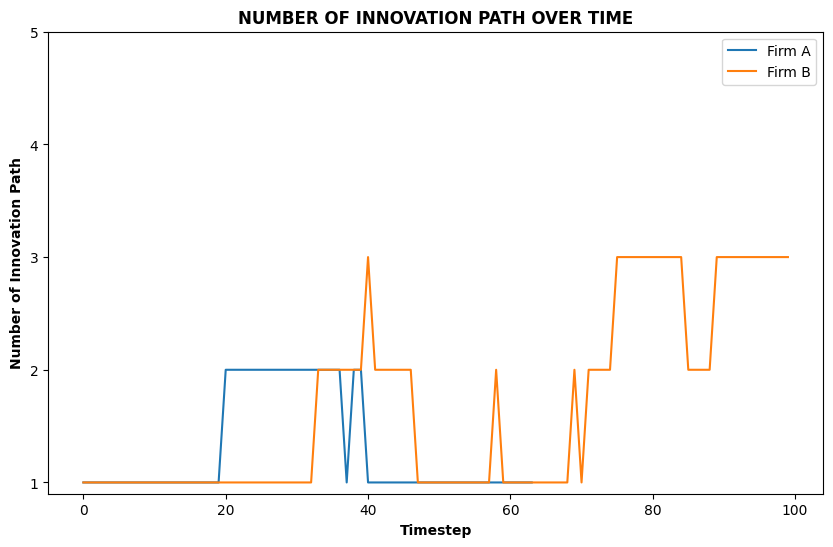

In [7]:
plt.figure(figsize=(10,6))
plt.plot(firm_a['timestep'], firm_a['numPath'], label='Firm A')
plt.plot(firm_b['timestep'], firm_b['numPath'], label='Firm B')

plt.xlabel('Timestep', fontweight = 'bold', fontsize = 10)
plt.ylabel('Number of Innovation Path',  fontweight = 'bold', fontsize = 10)
plt.legend()
plt.title('NUMBER OF INNOVATION PATH OVER TIME', fontweight = 'heavy', fontsize = 12)
plt.yticks([1,2,3,4,5])
plt.show()

In [32]:
def run_simulation(num_firms):
    firms = [Firm(f'Firm {chr(65+i)}') for i in range(num_firms)]
    for timestep in range(TIME_DURATION):
        for firm in firms:
            if firm.bankrupt:
                continue
            firm.invest()

    bankrupt_firms = len([firm for firm in firms if firm.bankrupt])

    return bankrupt_firms

def survival_scenarios(number_of_iterations):
    both_survived = 0
    only_one_survived = 0
    both_bankrupt = 0
    total_surviving_firms = 0

    for _ in range(number_of_iterations):
        bankrupt_firms = run_simulation(2)  # Since we're considering scenarios for two firms
        surviving_firms = 2 - bankrupt_firms
        total_surviving_firms += surviving_firms
        if bankrupt_firms == 0:
            both_survived += 1
        elif bankrupt_firms == 1:
            only_one_survived += 1
        else:
            both_bankrupt += 1

    both_survived_rate = both_survived / number_of_iterations
    only_one_survived_rate = only_one_survived / number_of_iterations
    both_bankrupt_rate = both_bankrupt / number_of_iterations
    average_survival_rate = total_surviving_firms / (number_of_iterations * 2) # Since we have 2 firms per iteration

    return average_survival_rate, both_survived_rate, only_one_survived_rate, both_bankrupt_rate

In [72]:
avg_survival_rate, both_survived_rate, only_one_survived_rate, both_bankrupt_rate  = survival_scenarios(10000)
print(f'Both survived rate: {both_survived_rate * 100:.2f}%')
print(f'Only one survived rate: {only_one_survived_rate * 100:.2f}%')
print(f'Both bankrupt rate: {both_bankrupt_rate * 100:.2f}%')
print(f'Average survival rate: {avg_survival_rate * 100:.2f}%')

Both survived rate: 18.21%
Only one survived rate: 48.91%
Both bankrupt rate: 32.88%
Average survival rate: 42.66%
